# Self evaluation

I enjoyed this assignment a lot, especially previous assignments. I can tell how errors and R2 change when I run regression prediction again and again, which is very fun!

- Airfares Dataset \
From simple regression model to Ridge or Lasso with CV regression, codes are almost same, but the way to choose explanatory variables and input variables chosen are different. I cleaned the data and made dummies for not numerical variables. However, I used correlation heatmap, but the solution just used dataframe. For second regression model, I have never thought about distance squared, which leaves a doubt. I think distance and distance squared are highly correlated but the solution made a new variable called distance squared, so I wonder why. I used e_income, coupon, and distance as input variables. I also did both Ridge and Lasso regression with CV to get used to regression prediction. The results are also quite similar with the solution. 

- BostonHousing Dataset \
I thought this dataset is also easy like the previous one. I overlooked the variables of RAD and ZN. I did not thoroughly looked the dataframe, so I thought RAD and ZN variables are numerical variables. Thus, I just put variables and did not assign those as categorical variables, and I did not make dummies for them. I realized after looking through the solution file. Except that, other codes are almost same but slightly different like which variables chosen. I think I need to look thoroughly at data first. Some data looks numerical but actually they are not. However, it does not look I made a critical mistake and I am happy to learn more.

- Toyota Corolla Dataset \
This dataset was the hardest for me. There are lots of categorical variables, so I had to assign them as categorical variables and changed to dummies. Also, dataset is the largest among three datasets. I also dropped ID and Model, which are useless and too excessive like the solution. I had doubts about year and month variables when I did the homework. I was not sure if I had to assign them as numerical variables or categorical varibels. I set them as numerical variables, but from the solution file, it looks they are categorical variables. As I set dummies for categorical variables, there are lots of colums made compared to previous datasets. However, I think it was a good experience! 


# Regression

1. Airfares Dataset

In [2]:
# Libraries
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.offline as pyo
import matplotlib.pyplot as plt
pyo.init_notebook_mode()

import plotly.graph_objects as go

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score, mean_squared_error

In [3]:
# Read and clean the data
air_df = pd.read_csv('Airfares.csv')
air_df.dropna(inplace=True)
air_df.drop(axis=1, columns = ['S_CODE', 'S_CITY', 'E_CODE', 'E_CITY'], inplace = True)

# Define which variables are categorical among potential explanatory variables
air_df['NEW'] = air_df['NEW'].astype('category')
air_df['SLOT'] = air_df['SLOT'].astype('category')
air_df['GATE'] = air_df['GATE'].astype('category')
air_df['VACATION'] = air_df['VACATION'].astype('category')

# Create dummy columns which are categorical variables
dummies = pd.get_dummies(air_df[['VACATION','SW','SLOT','GATE']])
air_df.drop(axis=1, columns = ['VACATION','SW','SLOT','GATE'], inplace = True)

air_df = air_df.merge(dummies,left_index=True,right_index=True)
air_df

COUPON NEW       HI  S_INCOME  E_INCOME    S_POP    E_POP  DISTANCE  \
0      1.00   3  5291.99   28637.0   21112.0  3036732   205711       312   
1      1.06   3  5419.16   26993.0   29838.0  3532657  7145897       576   
2      1.06   3  9185.28   30124.0   29838.0  5787293  7145897       364   
3      1.06   3  2657.35   29260.0   29838.0  7830332  7145897       612   
4      1.06   3  2657.35   29260.0   29838.0  7830332  7145897       612   
..      ...  ..      ...       ...       ...      ...      ...       ...   
633    1.08   3  2216.70   32991.0   37375.0  8621121   991717      1030   
634    1.08   0  2216.70   32991.0   37375.0  8621121   991717      1030   
635    1.17   3  6797.80   27994.0   37375.0  4948339   991717       960   
636    1.28   3  5566.43   31981.0   37375.0  4549784   991717       858   
637    1.28   3  5566.43   31981.0   37375.0  4549784   991717       858   

       PAX    FARE  VACATION_No  VACATION_Yes  SW_No  SW_Yes  SLOT_Controlled  \
0     7864   64.11            1             0      0       1                0   
1     8820  174.47            1             0      1       0                0   
2     6452  207.76            1             0      1       0                0   
3    25144   85.47            1             0      0       1                1   
4    25144   85.47            1             0      0       1                0   
..     ...     ...          ...           ...    ...     ...              ...   
633  34324  129.63            0             1      1       0                1   
634  34324  129.63            0             1      1       0                0   
635   6016  124.87            0             1      1       0                0   
636   4877  129.62            0             1      1       0                0   
637   4877  129.62            0             1      1       0                1   

     SLOT_Free  GATE_Constrained  GATE_Free  
0            1                 0          1  
1            1                 0          1  
2            1                 0          1  
3            0                 0          1  
4            1                 0          1  
..         ...               ...        ...  
633          0                 0          1  
634          1                 1          0  
635          1                 0          1  
636          1                 0          1  
637          0                 0          1  

[638 rows x 18 columns]

In [4]:
air_df.describe().T

count          mean           std        min           25%  \
COUPON            638.0  1.202335e+00  2.038207e-01       1.00  1.040000e+00   
HI                638.0  4.442141e+03  1.724267e+03    1230.48  3.090137e+03   
S_INCOME          638.0  2.775986e+04  3.596208e+03   14600.00  2.470600e+04   
E_INCOME          638.0  2.766373e+04  4.611325e+03   14600.00  2.390300e+04   
S_POP             638.0  4.557004e+06  3.010985e+06   29838.00  1.862106e+06   
E_POP             638.0  3.194503e+06  2.735604e+06  111745.00  1.228816e+06   
DISTANCE          638.0  9.756536e+02  6.462424e+02     114.00  4.550000e+02   
PAX               638.0  1.278221e+04  1.320223e+04    1504.00  5.328500e+03   
FARE              638.0  1.608767e+02  7.602244e+01      42.47  1.062900e+02   
VACATION_No       638.0  7.335423e-01  4.424532e-01       0.00  0.000000e+00   
VACATION_Yes      638.0  2.664577e-01  4.424532e-01       0.00  0.000000e+00   
SW_No             638.0  6.959248e-01  4.603756e-01       0.00  0.000000e+00   
SW_Yes            638.0  3.040752e-01  4.603756e-01       0.00  0.000000e+00   
SLOT_Controlled   638.0  2.852665e-01  4.518955e-01       0.00  0.000000e+00   
SLOT_Free         638.0  7.147335e-01  4.518955e-01       0.00  0.000000e+00   
GATE_Constrained  638.0  1.943574e-01  3.960156e-01       0.00  0.000000e+00   
GATE_Free         638.0  8.056426e-01  3.960156e-01       0.00  1.000000e+00   

                          50%           75%         max  
COUPON                  1.150  1.297500e+00        1.94  
HI                   4208.185  5.480575e+03    10000.00  
S_INCOME            28637.000  2.969350e+04    38813.00  
E_INCOME            26409.000  3.198100e+04    38813.00  
S_POP             3532657.000  7.830332e+06  9056076.00  
E_POP             2195215.000  4.549784e+06  9056076.00  
DISTANCE              850.000  1.306250e+03     2764.00  
PAX                  7792.000  1.409050e+04    73892.00  
FARE                  144.600  2.093500e+02      402.02  
VACATION_No             1.000  1.000000e+00        1.00  
VACATION_Yes            0.000  1.000000e+00        1.00  
SW_No                   1.000  1.000000e+00        1.00  
SW_Yes                  0.000  1.000000e+00        1.00  
SLOT_Controlled         0.000  1.000000e+00        1.00  
SLOT_Free               1.000  1.000000e+00        1.00  
GATE_Constrained        0.000  0.000000e+00        1.00  
GATE_Free               1.000  1.000000e+00        1.00

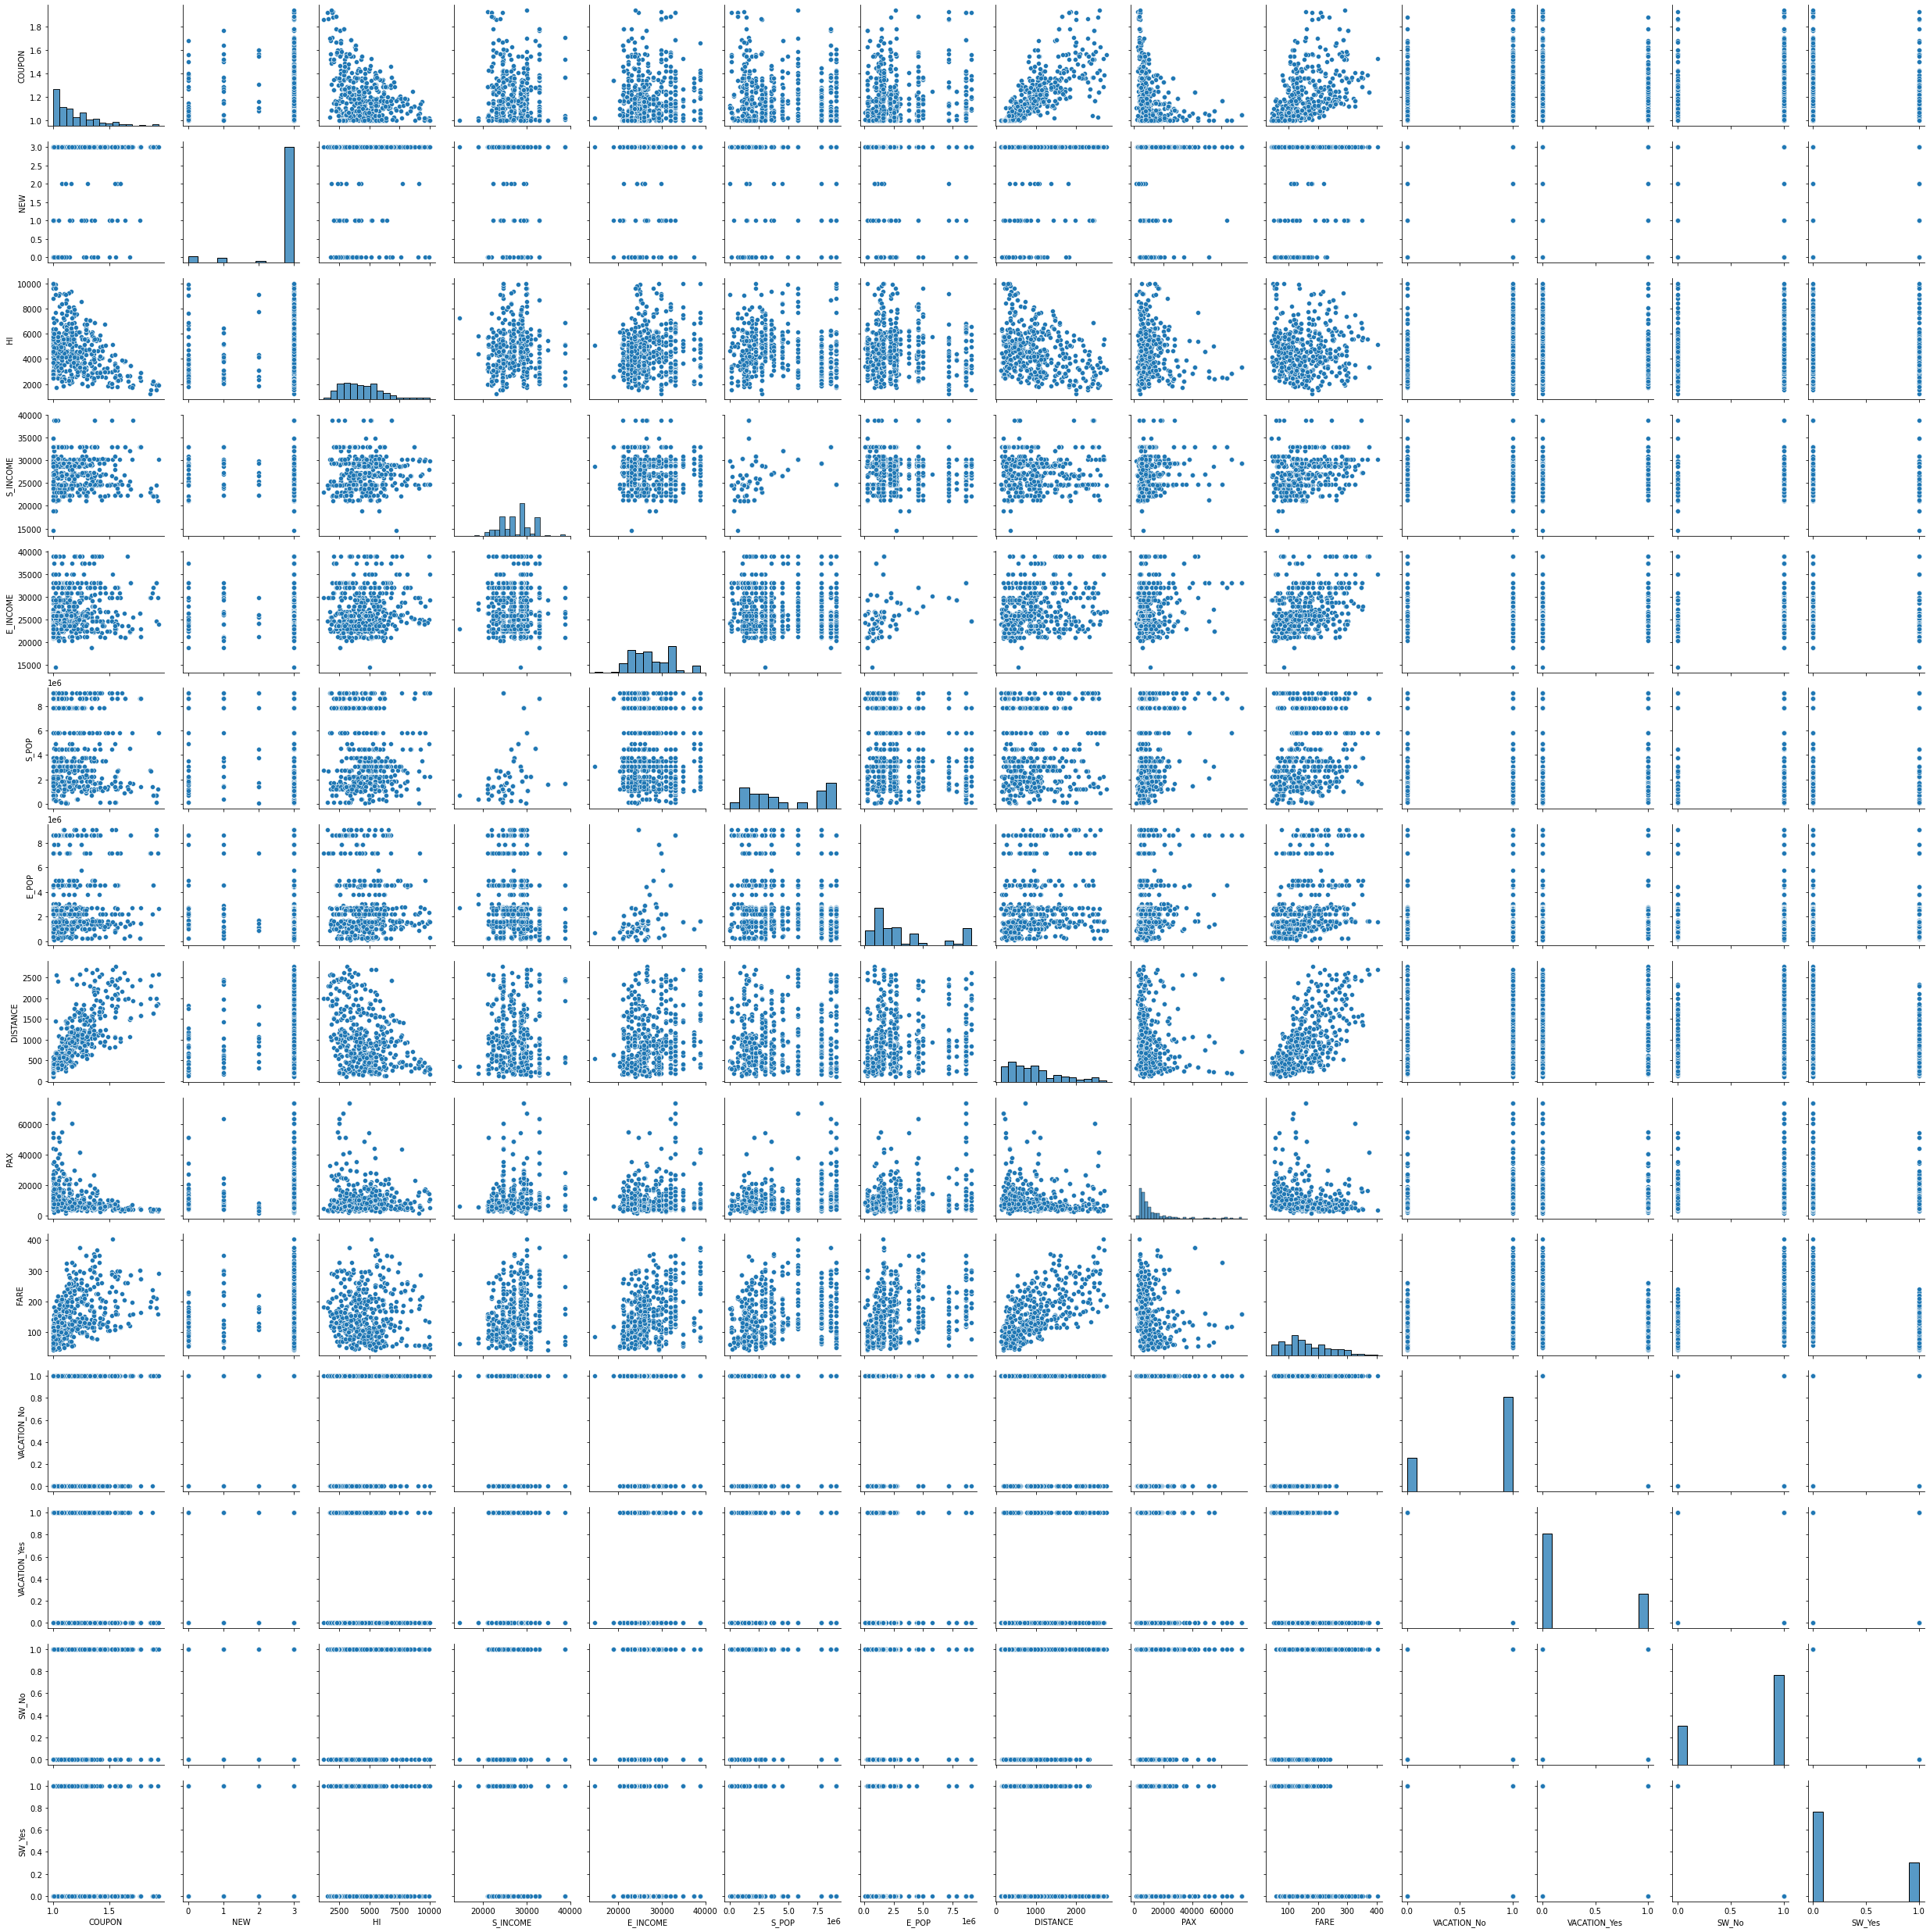

In [6]:
sns.pairplot(air_df)

In [66]:
fig_air = px.imshow(air_df.corr())
fig_air.show()
# The heatmap shows which variables have high correlations with fare; the highest one is distance.

In [23]:
def train_test_metrics(X_train,X_test,y_train,y_test,model):
    names=['R2','Adj-R2','MAE','MAPE','SSE'] 
    
    # Training Metrics
    y_hat = model.predict(X_train)
    
    # Create R2
    r2 = r2_score(y_train,y_hat).round(3)
    
    # Create adj_R2
    adj_r2 = (1-(1-r2_score(y_train,y_hat))*(len(y_train)-1)/(len(y_train)-len(model.coef_)-1)).round(3)

    # Create MAE
    mae = mean_absolute_error(y_train,y_hat).round(3)
    
    # Create MAPE
    mape = mean_absolute_percentage_error(y_train,y_hat).round(3)*100
    
    # Create MSE
    mse = (mean_squared_error(y_train,y_hat)*len(y_train)).round(3)
    
    train_metrics = [r2, adj_r2, mae, mape,mse]
    train_metrics = pd.DataFrame({'Train':train_metrics},index=names)
    
    # Testing Metrics
    y_hat = model.predict(X_test)
    test_metrics = [r2_score(y_test,y_hat).round(3),
                    (1-(1-r2_score(y_test,y_hat))*(len(y_test)-1)/(len(y_test)-len(model.coef_)-1)).round(3),
                    mean_absolute_error(y_test,y_hat).round(3),
                    mean_absolute_percentage_error(y_test,y_hat).round(3)*100,
                    (mean_squared_error(y_test,y_hat)*len(y_test)).round(3)
                   ]
    test_metrics = pd.DataFrame({'Test':test_metrics},index=names)
    
    all_metrics = train_metrics.merge(test_metrics,left_index=True,right_index=True)
    
    print(pd.DataFrame({'Predictor':X_train.columns, 'coefficent':model.coef_.round(3)}))
    print('\n')
    print(all_metrics)
    print('\n')

In [54]:
# Create regression simple model, setting input variable and target variable
predictors = ['DISTANCE']
X = air_df[predictors]
y = air_df['FARE']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=1)

model = LinearRegression()
model.fit(X_train,y_train)

train_test_metrics(X_train,X_test,y_train,y_test,model)


  Predictor  coefficent
0  DISTANCE       0.078


              Train        Test
R2            0.438       0.479
Adj-R2        0.436       0.476
MAE          47.223      47.183
MAPE         36.100      35.300
SSE     1526829.536  502504.575




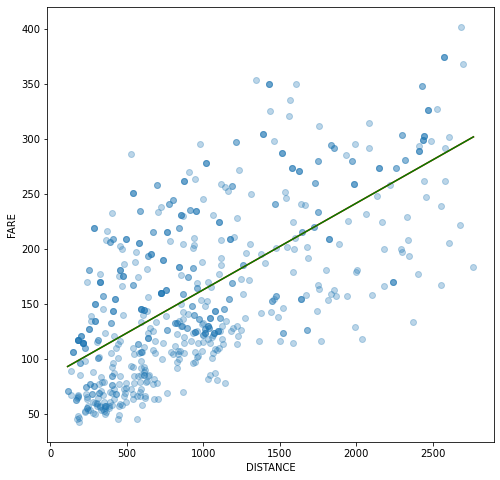

In [7]:
# Create scatter plot and regression line
import statsmodels.formula.api as smf 
plt.figure(figsize=(8,8)) 
plt.scatter(air_df['DISTANCE'],air_df['FARE'], alpha=0.3)
plt.xlabel('DISTANCE')
plt.ylabel('FARE')
d_linspace = np.linspace(air_df['DISTANCE'].min(), air_df['DISTANCE'].max(), 100)
est = smf.ols(formula='FARE ~ DISTANCE', data=air_df).fit()
plt.plot(d_linspace, est.params[0] + est.params[1]*d_linspace , 'r')
plt.plot(d_linspace, est.params[0] + est.params[1]*d_linspace , 'g')


Q1. Create a simple predictive model of the target variable - "simple" meaning choose just ONE explanatory variable.\
a. How did you choose the explanatory variable? \
The way I choose the explanatory variable is using the heatmap to see the correlation with fare(target variable). The highest correlation with fare is distance. 

b. Does your model under or overfit the data?  How do you know? \
My model is not underfitting nor overfitting, because MAE, MAPE from test data are quite similar MAE, MAPE from train data. However, SSE from test data is far less, so if I have to choose overfitting or underfitting, I would go with underfitting. 

Q2. Create a slightly more complicated predictive model of the target variable.  
In particular, add 1-3 more variables that you think have potential to improve your model.


In [51]:
# Create second model adding more explanatory variables
predictors = ['DISTANCE','COUPON','E_INCOME']
X = air_df[predictors]
y = air_df['FARE']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=1)

model = LinearRegression()
model.fit(X_train,y_train)

train_test_metrics(X_train,X_test,y_train,y_test,model)

  Predictor  coefficent
0  DISTANCE       0.069
1    COUPON      18.536
2  E_INCOME       0.004


              Train        Test
R2            0.490       0.502
Adj-R2        0.487       0.493
MAE          43.878      45.529
MAPE         33.300      33.500
SSE     1383940.662  480050.945




Q2.
a. Take note of any differences in model performance from 1. to 2. \
Considering the heatmap for correlation, I put the second highest and third highest correlated variables, Coupon and E_income, with target variable. Comparing the performance from first model, the performace improved in this model. R2 increases both for model using train dataset and test dataset. Likewise, MAE, MAPE, and SSE all shows explicitly decreased errors, which means performance for second model improves more than the first one.

b. Do you notice any major changes in the magnitudes of your parameter estimates? \
While the parameter estimate for distance is 0.078 in the first model, the parameter estimate for distance in the second model is 0.069. I can see there is 12% decrease from parameter estimate for distance from first model to second model.

c. Pick one parameter estimate and, in words, describe what it means? \
In case of distance parameter estimate, 0.069, it means it is positively correlated with dependenpt variable(fare). Thus, if distance increases, fare would increase the amount of 0.069 times distance.

In [9]:
# Run Ridge Regression with cross validation
predictors = [
'COUPON','NEW','VACATION_Yes','VACATION_No','SW_Yes','SW_No','S_INCOME','E_INCOME','S_POP','E_POP','DISTANCE','PAX'
             ]
X = air_df[predictors]
y = air_df['FARE']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=1)

r_alphas = [0.04,0.06,0.08,0.085,0.09,0.099,.1,0.11,0.2,0.25]

model = RidgeCV(alphas=r_alphas,normalize=True)
model.fit(X_train,y_train)

train_test_metrics(X_train,X_test,y_train,y_test,model)

       Predictor  coefficent
0         COUPON      -5.984
1            NEW      -1.773
2   VACATION_Yes     -20.018
3    VACATION_No      20.018
4         SW_Yes     -24.731
5          SW_No      24.731
6       S_INCOME       0.002
7       E_INCOME       0.002
8          S_POP       0.000
9          E_POP       0.000
10      DISTANCE       0.065
11           PAX      -0.001


             Train        Test
R2           0.745       0.754
Adj-R2       0.739       0.734
MAE         29.691      31.217
MAPE        21.900      22.300
SSE     691315.417  237317.890




In [10]:
# Show alpha for Ridge Cross Validation
print('RidgeCV Alpha Selection: ',model.alpha_)

RidgeCV Alpha Selection:  0.04


In [11]:
# Making a dataframe from Ridge regression
ridge_coef = pd.DataFrame({'Predictor':X_train.columns, 'coefficent':model.coef_.round(3)})

In [12]:
# Run Lasso Regression with cross validation
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV,LassoCV
predictors = [
'COUPON','NEW','VACATION_Yes','VACATION_No','SW_Yes','SW_No','S_INCOME','E_INCOME','S_POP','E_POP','DISTANCE','PAX'
             ]
X = air_df[predictors]
y = air_df['FARE']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=1)

r_alphas = [0.04,0.06,0.08,0.085,0.09,0.099,.1,0.11,0.2,0.25]

model = LassoCV(alphas=r_alphas,normalize=True)
model.fit(X_train,y_train)

train_test_metrics(X_train,X_test,y_train,y_test,model)


       Predictor  coefficent
0         COUPON      -0.918
1            NEW      -0.407
2   VACATION_Yes     -40.510
3    VACATION_No       0.000
4         SW_Yes     -49.347
5          SW_No       0.000
6       S_INCOME       0.001
7       E_INCOME       0.002
8          S_POP       0.000
9          E_POP       0.000
10      DISTANCE       0.066
11           PAX      -0.001


             Train        Test
R2           0.744       0.753
Adj-R2       0.737       0.733
MAE         29.758      31.205
MAPE        21.900      22.100
SSE     695115.305  238172.970




In [13]:
# Show alpha for Lasso Cross Validation
print('LassoCV Alpha Selection: ',model.alpha_)

LassoCV Alpha Selection:  0.04


In [14]:
# Create a dataframe from Lasso regression
lasso_coef = pd.DataFrame({'Predictor':X_train.columns, 'coefficent':model.coef_.round(3)})
# Merge dataframe from Ridge regression result and Lasso regression
print('Lasso Coefficients on the LEFT, Ridge Coefficients on the RIGHT')
lasso_coef.merge(ridge_coef,left_index=True,right_index=True)

Lasso Coefficients on the LEFT, Ridge Coefficients on the RIGHT


Predictor_x  coefficent_x   Predictor_y  coefficent_y
0         COUPON        -0.918        COUPON        -5.984
1            NEW        -0.407           NEW        -1.773
2   VACATION_Yes       -40.510  VACATION_Yes       -20.018
3    VACATION_No         0.000   VACATION_No        20.018
4         SW_Yes       -49.347        SW_Yes       -24.731
5          SW_No         0.000         SW_No        24.731
6       S_INCOME         0.001      S_INCOME         0.002
7       E_INCOME         0.002      E_INCOME         0.002
8          S_POP         0.000         S_POP         0.000
9          E_POP         0.000         E_POP         0.000
10      DISTANCE         0.066      DISTANCE         0.065
11           PAX        -0.001           PAX        -0.001

Q3. Add all potential explanatory variables to your model and any data transformations you think could be helpful.  

a. Use Ridge or Lasso regression in collaboration with Cross-Validation to arrive at a final model form.
- Note: your use of the methods above should result in some parameters dropping out of your model - take note of which parameters and associated variables are important to good model fit and a low degree of model variability.

Answer: \
At first, I put most of variables, which I suppose as potentail explanatory variables, excpet for few variables referring to the correlation heatmap. I put 'COUPON','NEW','VACATION_Yes','VACATION_No','SW_Yes','SW_No','S_INCOME','E_INCOME','S_POP','E_POP','DISTANCE','PAX' as explanatory variables when I run Ridge regression and Lasso regression both with cross validation. From Ridge regression, it seems that useful variables are COUPON, NEW, VACATION_Yes, VACATION_No, SW_Yes, SW_No, DISTANCE. However, Lasso regression, which is more aggressive than Ridge, it seems that useful variables are only COUPON, NEW, VACATION_Yes, SW_Yes, DISTANCE. Model peformances far more improves than previous model, referring to the result. Considering the cost, getting rid of unhelpful variables can definitely improve the performance of the models.

In [102]:
# Show all results by creating data frame
result_air = {'Equation':['y = 0.078DISTANCE','y = 0.069DISTANCE + 18.536COUPON + 0.004E_INCOME', 'y = -5.984COUPON - 1.773NEW - 20.018VACATION_Yes + 20.018VACATION_No - 24.731SW_Yes + 24.731SW_No + 0.002S_INCOME + 0.002E_INCOME + 0.065DISTANCE - 0.001PAX','y = -0.918COUPON - 0.407NEW -40.510VACATION_Yes - 49.347SW_Yes + 0.001S_INCOME + 0.002E_INCOME + 0.066DISTANCE - 0.001PAX'], 
              'MAE(Train-Test)':['47.223-47.183','43.878-45.529','29.691-31.217','29.758-31.205'],'MAPE(Train-Test)':['36.100-35.300','33.300-33.500','21.900-22.300','21.900-22.100'],
          'SSE(Train-Test)':['1526829.536-502504.575','1383940.662-480050.945','691315.417-237317.890','695115.305-238172.970']
         }
df_air = pd.DataFrame(result_air,index = ['model1','model2','RidgeCV','LassoCV'])
df_air

Equation MAE(Train-Test)  \
model1                                   y = 0.078DISTANCE   47.223-47.183   
model2    y = 0.069DISTANCE + 18.536COUPON + 0.004E_INCOME   43.878-45.529   
RidgeCV  y = -5.984COUPON - 1.773NEW - 20.018VACATION_Y...   29.691-31.217   
LassoCV  y = -0.918COUPON - 0.407NEW -40.510VACATION_Ye...   29.758-31.205   

        MAPE(Train-Test)         SSE(Train-Test)  
model1     36.100-35.300  1526829.536-502504.575  
model2     33.300-33.500  1383940.662-480050.945  
RidgeCV    21.900-22.300   691315.417-237317.890  
LassoCV    21.900-22.100   695115.305-238172.970

2. BostonHousing Dataset

In [89]:
# Read and clean the data
bh_df = pd.read_csv('BostonHousing.csv')
bh_df.dropna(inplace=True)
bh_df

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO  LSTAT  MEDV  CAT. MEDV  
0       15.3   4.98  24.0          0  
1       17.8   9.14  21.6          0  
2       17.8   4.03  34.7          1  
3       18.7   2.94  33.4          1  
4       18.7   5.33  36.2          1  
..       ...    ...   ...        ...  
501     21.0   9.67  22.4          0  
502     21.0   9.08  20.6          0  
503     21.0   5.64  23.9          0  
504     21.0   6.48  22.0          0  
505     21.0   7.88  11.9          0  

[506 rows x 14 columns]

In [90]:
bh_df.describe().T

count        mean         std        min         25%        50%  \
CRIM       506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
ZN         506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
INDUS      506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
CHAS       506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
NOX        506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
RM         506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
AGE        506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
DIS        506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
RAD        506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
TAX        506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
PTRATIO    506.0   18.455534    2.164946   12.60000   17.400000   19.05000   
LSTAT      506.0   12.653063    7.141062    1.73000    6.950000   11.36000   
MEDV       506.0   22.532806    9.197104    5.00000   17.025000   21.20000   
CAT. MEDV  506.0    0.166008    0.372456    0.00000    0.000000    0.00000   

                  75%       max  
CRIM         3.677083   88.9762  
ZN          12.500000  100.0000  
INDUS       18.100000   27.7400  
CHAS         0.000000    1.0000  
NOX          0.624000    0.8710  
RM           6.623500    8.7800  
AGE         94.075000  100.0000  
DIS          5.188425   12.1265  
RAD         24.000000   24.0000  
TAX        666.000000  711.0000  
PTRATIO     20.200000   22.0000  
LSTAT       16.955000   37.9700  
MEDV        25.000000   50.0000  
CAT. MEDV    0.000000    1.0000

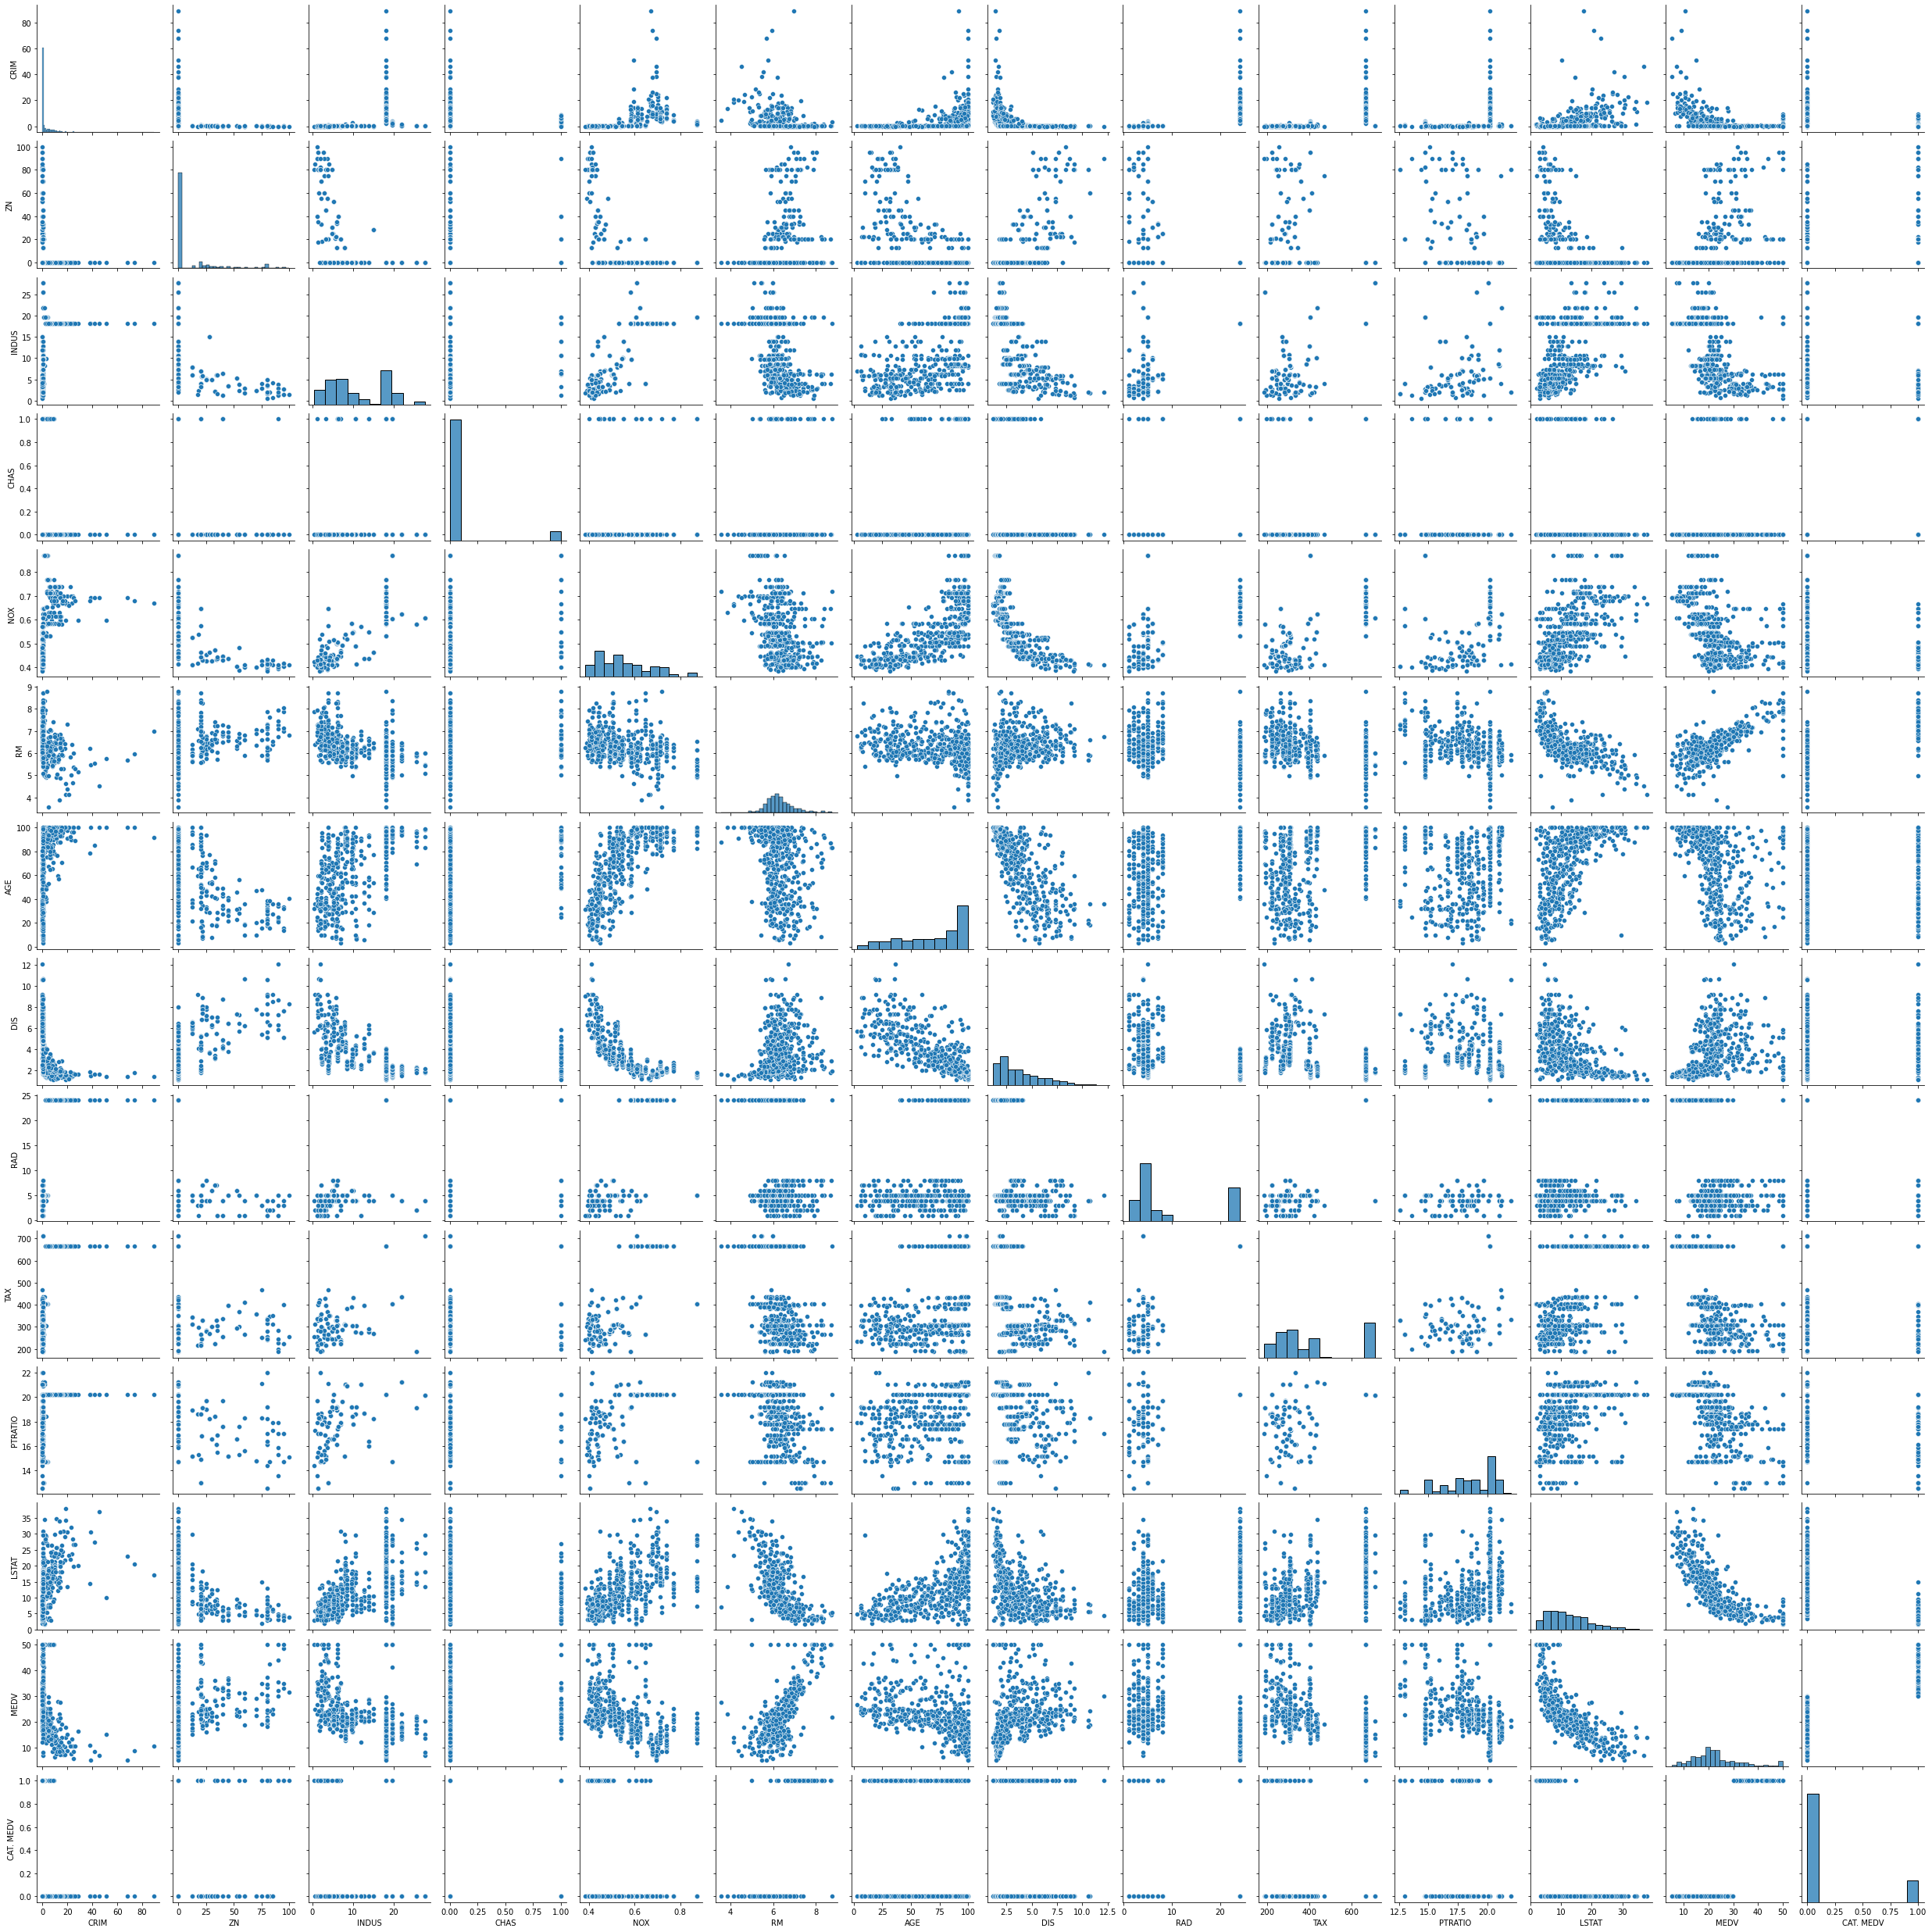

In [30]:
sns.pairplot(bh_df)

In [50]:
fig_bh = px.imshow(bh_df.corr())
fig_bh.show()
# The heatmap shows which variables have high correlations with fare; the highest one is distance.

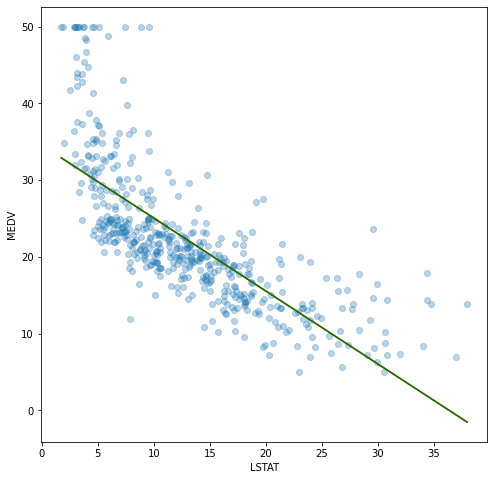

In [91]:
# Create scatter plot and regression line
plt.figure(figsize=(8,8)) 
plt.scatter(bh_df['LSTAT'],bh_df['MEDV'], alpha=0.3)
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
d_linspace = np.linspace(bh_df['LSTAT'].min(), bh_df['LSTAT'].max(), 100)
est = smf.ols(formula='MEDV ~ LSTAT', data=bh_df).fit()
plt.plot(d_linspace, est.params[0] + est.params[1]*d_linspace , 'r')
plt.plot(d_linspace, est.params[0] + est.params[1]*d_linspace , 'g')


In [92]:
# Create simple regression model setting dependant and independant variable
predictors = ['LSTAT']
X = bh_df[predictors]
y = bh_df['MEDV']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=1)

model = LinearRegression()
model.fit(X_train,y_train)

train_test_metrics(X_train,X_test,y_train,y_test,model)

  Predictor  coefficent
0     LSTAT      -0.911


            Train      Test
R2          0.547     0.533
Adj-R2      0.545     0.529
MAE         4.353     4.981
MAPE       21.200    22.200
SSE     13636.473  5878.377




Q1. Create a simple predictive model of the target variable - "simple" meaning choose just ONE explanatory variable.\
a. How did you choose the explanatory variable? \
The way I choose the explanatory variable is using the heatmap to see the correlation with MEDV(target variable).
The highest correlation with MEDV is CAT.MEDV, but it is binary variable, so I choose the second highest correlated varible, LSTAT. 

b. Does your model under or overfit the data?  How do you know? \
My model is not underfitting nor overfitting, because MAE, MAPE from test data are quite similar MAE, MAPE from train data. 
The difference is not big, but errors from test dataset such as MAE and MAPE are a little bit higher than errors from train dataset.However, SSE from test data set is lower than SSE from train dataset. If I have to choose how the model fits between underfitting and overfitting, I would go overfitting, because errors from train dataset is lower in general than errors from test dataset.

In [93]:
# Create another regression model adding more explanatory variables
predictors = ['LSTAT','RM','PTRATIO']
X = bh_df[predictors]
y = bh_df['MEDV']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=1)

model = LinearRegression()
model.fit(X_train,y_train)

train_test_metrics(X_train,X_test,y_train,y_test,model)

  Predictor  coefficent
0     LSTAT      -0.601
1        RM       3.587
2   PTRATIO      -0.941


            Train      Test
R2          0.655     0.721
Adj-R2      0.652     0.714
MAE         3.580     4.074
MAPE       18.400    19.700
SSE     10371.069  3512.074




Q2.
a. Take note of any differences in model performance from 1. to 2. \
Considering the heatmap for correlation, I put the second highest and third highest correlated variables except for binary variables, RM and PTRATIO, with target variable. Comparing the performance from first model, the performace improved in this model. R2 increases both for model using train dataset and test dataset. Likewise, MAE, MAPE, and SSE all shows explicitly decreased errors, which means performance for second model improves more than the first one.

b. Do you notice any major changes in the magnitudes of your parameter estimates? \
While the parameter estimate for LSTAT is -0.911 in the first model, the parameter estimate for LSTAT in the second model is -0.601. I can see there is 34% decrease from parameter estimate for LSTAT from first model to second model.

c. Pick one parameter estimate and, in words, describe what it means? \
In case of LSTAT parameter estimate, -0.601, it means it is negatively correlated with dependenpt variable(MEDV). Thus, if LSTAT increases, MEDV would decrease the amount of 0.601 times LSTAT.

In [54]:
# Define which variables are categorical among potential explanatory variables
bh_df['RAD'] = bh_df['RAD'].astype('category')
bh_df['CAT. MEDV'] = bh_df['CAT. MEDV'].astype('category')

In [94]:
# Run Ridge Regression with cross validation
predictors = ['CRIM','ZN','INDUS','NOX','RM','AGE','TAX','PTRATIO','LSTAT','CAT. MEDV','RAD'
             ]
X = bh_df[predictors]
y = bh_df['MEDV']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=1)

r_alphas = [0.04,0.06,0.08,0.085,0.09,0.099,.1,0.11,0.2,0.25]

model = RidgeCV(alphas=r_alphas,normalize=True)
model.fit(X_train,y_train)

train_test_metrics(X_train,X_test,y_train,y_test,model)

    Predictor  coefficent
0        CRIM      -0.114
1          ZN      -0.029
2       INDUS       0.120
3         NOX     -11.208
4          RM       0.881
5         AGE       0.002
6         TAX      -0.004
7     PTRATIO      -0.594
8       LSTAT      -0.451
9   CAT. MEDV      11.943
10        RAD       0.132


           Train      Test
R2         0.821     0.836
Adj-R2     0.815     0.820
MAE        2.753     2.936
MAPE      13.600    15.000
SSE     5397.302  2065.203




In [95]:
# Making a dataframe from Ridge regression
ridge_coef = pd.DataFrame({'Predictor':X_train.columns, 'coefficent':model.coef_.round(3)})

In [96]:
# Run Lasso Regression with Cross Validation 
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV,LassoCV
predictors = ['CRIM','ZN','INDUS','NOX','RM','AGE','TAX','PTRATIO','LSTAT','CAT. MEDV','RAD'
             ]
X = bh_df[predictors]
y = bh_df['MEDV']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=1)

r_alphas = [0.04,0.06,0.08,0.085,0.09,0.099,.1,0.11,0.2,0.25]

model = LassoCV(alphas=r_alphas,normalize=True)
model.fit(X_train,y_train)

train_test_metrics(X_train,X_test,y_train,y_test,model)

    Predictor  coefficent
0        CRIM      -0.045
1          ZN       0.000
2       INDUS      -0.000
3         NOX      -0.000
4          RM       0.239
5         AGE      -0.000
6         TAX      -0.000
7     PTRATIO      -0.165
8       LSTAT      -0.468
9   CAT. MEDV      11.467
10        RAD      -0.000


           Train      Test
R2         0.790     0.789
Adj-R2     0.784     0.769
MAE        2.994     3.224
MAPE      15.700    16.600
SSE     6316.466  2655.226




In [97]:
# Create a dataframe from Lasso regression
lasso_coef = pd.DataFrame({'Predictor':X_train.columns, 'coefficent':model.coef_.round(3)})
# Merge dataframe from Ridge regression result and Lasso regression
print('Lasso Coefficients on the LEFT, Ridge Coefficients on the RIGHT')
lasso_coef.merge(ridge_coef,left_index=True,right_index=True)

Lasso Coefficients on the LEFT, Ridge Coefficients on the RIGHT


Predictor_x  coefficent_x Predictor_y  coefficent_y
0         CRIM        -0.045        CRIM        -0.114
1           ZN         0.000          ZN        -0.029
2        INDUS        -0.000       INDUS         0.120
3          NOX        -0.000         NOX       -11.208
4           RM         0.239          RM         0.881
5          AGE        -0.000         AGE         0.002
6          TAX        -0.000         TAX        -0.004
7      PTRATIO        -0.165     PTRATIO        -0.594
8        LSTAT        -0.468       LSTAT        -0.451
9    CAT. MEDV        11.467   CAT. MEDV        11.943
10         RAD        -0.000         RAD         0.132

In [98]:
# Show alpha used in Lasso Regression with Cross Validation
print('LassoCV Alpha Selection: ',model.alpha_)

LassoCV Alpha Selection:  0.04


Q3. Add all potential explanatory variables to your model and any data transformations you think could be helpful.  

a. Use Ridge or Lasso regression in collaboration with Cross-Validation to arrive at a final model form.
- Note: your use of the methods above should result in some parameters dropping out of your model - take note of which parameters and associated variables are important to good model fit and a low degree of model variability.

Answer: \
At first, I put most of variables, which I suppose as potential explanatory variables, excpet for few variables referring to the correlation heatmap. I put 'CRIM','ZN','INDUS','NOX','RM','AGE','TAX','PTRATIO','LSTAT','CAT. MEDV','RAD' as explanatory variables when I run Ridge regression and Lasso regression both with cross validation. From Ridge regression, it seems that useful variables are CRIM, ZN, INDUS, NOS, RM, PTRATION, LSTAT, CAT.MEDV, RAD. However, Lasso regression, which is more aggressive than Ridge, it seems that useful variables are only CRIM, RM, PTRATION, LSTAT, CAT.MEDV. Model peformances more improves than previous model, referring to the result. Considering the cost, getting rid of unhelpful variables can definitely improve the performance of the models.


In [101]:
# Show all results by creating dataframe
result_bh = {'Equation':['y = -0.911LSTAT','y = -0.601LSTAT + 3.587RM - 0.941PTRATIO',
            'y = -0.114CRIM - 0.029ZN + 0.120INDUS - 11.208NOX + 0.881RM + 0.002AGE- 0.004TAX -0.594PTRATION - 0.451LSTAT + 11.943CAT. MEDV + 0.132RAD',
            'y = 00.045CRIM + 0.239RM - 0.165PTRATION - 0.468LSTAT + 11.467CAT. MEDV'],'MAE(Train-Test)':['4.353-4.981','3.580-4.074','2.753-2.936','2.994-3.224'],
            'MAPE(Train-Test)':['21.200-22.200','18.400-19.700','13.600-15.000','15.700-16.600'],
             'SSE(Train-Test)':['13636.473-5878.377','10371.069-3512.074','5397.302-2065.203','6316.466-2655.226']}

df_bh = pd.DataFrame(result_bh, index = ['model1','model2','RidgeCV','LassoCV'])

df_bh

Equation MAE(Train-Test)  \
model1                                     y = -0.911LSTAT     4.353-4.981   
model2            y = -0.601LSTAT + 3.587RM - 0.941PTRATIO     3.580-4.074   
RidgeCV  y = -0.114CRIM - 0.029ZN + 0.120INDUS - 11.208...     2.753-2.936   
LassoCV  y = 00.045CRIM + 0.239RM - 0.165PTRATION - 0.4...     2.994-3.224   

        MAPE(Train-Test)     SSE(Train-Test)  
model1     21.200-22.200  13636.473-5878.377  
model2     18.400-19.700  10371.069-3512.074  
RidgeCV    13.600-15.000   5397.302-2065.203  
LassoCV    15.700-16.600   6316.466-2655.226

3. Toyota Corolla Data set

In [18]:
# Read and clean the data
tc_df = pd.read_csv('ToyotaCorolla.csv')
tc_df.dropna(inplace=True)
tc_df.drop(axis=1, columns = ['Id', 'Model'], inplace = True)

# Define which variables are categorical among potential explanatory variables
tc_df['Fuel_Type'] = tc_df['Fuel_Type'].astype('category')
tc_df['Color'] = tc_df['Color'].astype('category')

# Create dummy variables
dummies = pd.get_dummies(tc_df[['Fuel_Type','Color']])
tc_df.drop(axis=1, columns = ['Fuel_Type','Color'], inplace = True)
tc_df = tc_df.merge(dummies,left_index=True,right_index=True)
tc_df

Price  Age_08_04  Mfg_Month  Mfg_Year     KM   HP  Met_Color  Automatic  \
0     13500         23         10      2002  46986   90          1          0   
1     13750         23         10      2002  72937   90          1          0   
2     13950         24          9      2002  41711   90          1          0   
3     14950         26          7      2002  48000   90          0          0   
4     13750         30          3      2002  38500   90          0          0   
...     ...        ...        ...       ...    ...  ...        ...        ...   
1431   7500         69         12      1998  20544   86          1          0   
1432  10845         72          9      1998  19000   86          0          0   
1433   8500         71         10      1998  17016   86          0          0   
1434   7250         70         11      1998  16916   86          1          0   
1435   6950         76          5      1998      1  110          0          0   

        CC  Doors  ...  Color_Beige  Color_Black  Color_Blue  Color_Green  \
0     2000      3  ...            0            0           1            0   
1     2000      3  ...            0            0           0            0   
2     2000      3  ...            0            0           1            0   
3     2000      3  ...            0            1           0            0   
4     2000      3  ...            0            1           0            0   
...    ...    ...  ...          ...          ...         ...          ...   
1431  1300      3  ...            0            0           1            0   
1432  1300      3  ...            0            0           0            0   
1433  1300      3  ...            0            0           1            0   
1434  1300      3  ...            0            0           0            0   
1435  1600      5  ...            0            0           0            1   

      Color_Grey  Color_Red  Color_Silver  Color_Violet  Color_White  \
0              0          0             0             0            0   
1              0          0             1             0            0   
2              0          0             0             0            0   
3              0          0             0             0            0   
4              0          0             0             0            0   
...          ...        ...           ...           ...          ...   
1431           0          0             0             0            0   
1432           1          0             0             0            0   
1433           0          0             0             0            0   
1434           1          0             0             0            0   
1435           0          0             0             0            0   

      Color_Yellow  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
1431             0  
1432             0  
1433             0  
1434             0  
1435             0  

[1436 rows x 48 columns]

In [19]:
tc_df.describe().T

count          mean           std     min      25%  \
Price              1436.0  10730.824513   3626.964585  4350.0   8450.0   
Age_08_04          1436.0     55.947075     18.599988     1.0     44.0   
Mfg_Month          1436.0      5.548747      3.354085     1.0      3.0   
Mfg_Year           1436.0   1999.625348      1.540722  1998.0   1998.0   
KM                 1436.0  68533.259749  37506.448872     1.0  43000.0   
HP                 1436.0    101.502089     14.981080    69.0     90.0   
Met_Color          1436.0      0.674791      0.468616     0.0      0.0   
Automatic          1436.0      0.055710      0.229441     0.0      0.0   
CC                 1436.0   1576.855850    424.386770  1300.0   1400.0   
Doors              1436.0      4.033426      0.952677     2.0      3.0   
Cylinders          1436.0      4.000000      0.000000     4.0      4.0   
Gears              1436.0      5.026462      0.188510     3.0      5.0   
Quarterly_Tax      1436.0     87.122563     41.128611    19.0     69.0   
Weight             1436.0   1072.459610     52.641120  1000.0   1040.0   
Mfr_Guarantee      1436.0      0.409471      0.491907     0.0      0.0   
BOVAG_Guarantee    1436.0      0.895543      0.305959     0.0      1.0   
Guarantee_Period   1436.0      3.815460      3.011025     3.0      3.0   
ABS                1436.0      0.813370      0.389750     0.0      1.0   
Airbag_1           1436.0      0.970752      0.168559     0.0      1.0   
Airbag_2           1436.0      0.722841      0.447751     0.0      0.0   
Airco              1436.0      0.508357      0.500104     0.0      0.0   
Automatic_airco    1436.0      0.056407      0.230786     0.0      0.0   
Boardcomputer      1436.0      0.294568      0.456007     0.0      0.0   
CD_Player          1436.0      0.218663      0.413483     0.0      0.0   
Central_Lock       1436.0      0.580084      0.493717     0.0      0.0   
Powered_Windows    1436.0      0.561978      0.496317     0.0      0.0   
Power_Steering     1436.0      0.977716      0.147657     0.0      1.0   
Radio              1436.0      0.146240      0.353469     0.0      0.0   
Mistlamps          1436.0      0.256964      0.437111     0.0      0.0   
Sport_Model        1436.0      0.300139      0.458478     0.0      0.0   
Backseat_Divider   1436.0      0.770195      0.420854     0.0      1.0   
Metallic_Rim       1436.0      0.204735      0.403649     0.0      0.0   
Radio_cassette     1436.0      0.145543      0.352770     0.0      0.0   
Parking_Assistant  1436.0      0.002786      0.052723     0.0      0.0   
Tow_Bar            1436.0      0.277855      0.448098     0.0      0.0   
Fuel_Type_CNG      1436.0      0.011838      0.108196     0.0      0.0   
Fuel_Type_Diesel   1436.0      0.107939      0.310411     0.0      0.0   
Fuel_Type_Petrol   1436.0      0.880223      0.324814     0.0      1.0   
Color_Beige        1436.0      0.002089      0.045675     0.0      0.0   
Color_Black        1436.0      0.133008      0.339702     0.0      0.0   
Color_Blue         1436.0      0.197075      0.397928     0.0      0.0   
Color_Green        1436.0      0.153203      0.360309     0.0      0.0   
Color_Grey         1436.0      0.209610      0.407172     0.0      0.0   
Color_Red          1436.0      0.193593      0.395251     0.0      0.0   
Color_Silver       1436.0      0.084958      0.278917     0.0      0.0   
Color_Violet       1436.0      0.002786      0.052723     0.0      0.0   
Color_White        1436.0      0.021588      0.145384     0.0      0.0   
Color_Yellow       1436.0      0.002089      0.045675     0.0      0.0   

                       50%       75%       max  
Price               9900.0  11950.00   32500.0  
Age_08_04             61.0     70.00      80.0  
Mfg_Month              5.0      8.00      12.0  
Mfg_Year            1999.0   2001.00    2004.0  
KM                 63389.5  87020.75  243000.0  
HP                   110.0    110.00     192.0  
Met_Color              1.0      1.00       1.0  
A

In [20]:
# Extract the numerical variables to create a heatmap
tc_new = tc_df[['Price','Age_08_04','Mfg_Month','Mfg_Year','KM','HP','CC','Doors']]

In [21]:
# Create a heatmap showing correlation
fig_tc = px.imshow(tc_new.corr())
fig_tc.show()

In [47]:
# Create simple regression model setting input and output
predictors = ['Mfg_Year']
X = tc_df[predictors]
y = tc_df['Price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=1)

model = LinearRegression()
model.fit(X_train,y_train)

train_test_metrics(X_train,X_test,y_train,y_test,model)

  Predictor  coefficent
0  Mfg_Year    2077.411


               Train          Test
R2      7.740000e-01  8.140000e-01
Adj-R2  7.730000e-01  8.130000e-01
MAE     1.232498e+03  1.107086e+03
MAPE    1.190000e+01  1.080000e+01
SSE     3.210770e+09  8.761639e+08




In [ ]:
# Create scatter plot and regression line
import statsmodels.formula.api as smf 
plt.figure(figsize=(8,8)) 
plt.scatter(tc_df['Mfg_Year'],tc_df['Price'], alpha=0.3)
plt.xlabel('Mfg_Year')
plt.ylabel('Price')
d_linspace = np.linspace(tc_df['Mfg_Year'].min(), tc_df['Mfg_Year'].max(), 100)
est = smf.ols(formula='Price ~ Mfg_Year', data=tc_df).fit()
plt.plot(d_linspace, est.params[0] + est.params[1]*d_linspace , 'r')
plt.plot(d_linspace, est.params[0] + est.params[1]*d_linspace , 'g')


Q1. Create a simple predictive model of the target variable - "simple" meaning choose just ONE explanatory variable.\
a. How did you choose the explanatory variable? \
The way I choose the explanatory variable is using the heatmap to see the correlation with Price(target variable).
The highest correlation with Price is Mfg_Year, so I chose it as a input variable. 

b. Does your model under or overfit the data?  How do you know? \
My model is not underfitting nor overfitting, because MAE, MAPE from test data are quite similar MAE, MAPE from train data. 
The difference is not big, but errors from test dataset such as MAE and MAPE are a little bit less than errors from train dataset.However, SSE from test data set is higher than SSE from train dataset. If I have to choose how the model fits between underfitting and overfitting, I would go underfitting, because errors from train dataset is higher in general than errors from test dataset.

In [157]:
# Create second regression model adding more explanatory variables
predictors = ['Mfg_Year','Age_08_04','KM']
X = tc_df[predictors]
y = tc_df['Price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=1)

model = LinearRegression()
model.fit(X_train,y_train)

train_test_metrics(X_train,X_test,y_train,y_test,model)

   Predictor  coefficent
0   Mfg_Year    1519.558
1  Age_08_04     -29.486
2         KM      -0.017


               Train          Test
R2      7.970000e-01  8.250000e-01
Adj-R2  7.970000e-01  8.240000e-01
MAE     1.156448e+03  1.090735e+03
MAPE    1.100000e+01  1.040000e+01
SSE     2.873644e+09  8.216100e+08




Q2.
a. Take note of any differences in model performance from 1. to 2. \
Considering the heatmap for correlation, I put the second highest and third highest correlated variables, Age_08_04 and KM, with target variable. Comparing the performance from first model, even though R2 decreases a little bit from first model to second model, 
the performace improved in this model in general. MAE, MAPE, and SSE all shows decreased errors, which seems performance for second model improves more than the first one in general. 

b. Do you notice any major changes in the magnitudes of your parameter estimates? \
While the parameter estimate for Mfg_Year is 2077.411 in the first model, the parameter estimate for Mfg_Year in the second model is 1519.558. I can see there is 27% decrease from parameter estimate for Mfg_Year from first model to second model.

c. Pick one parameter estimate and, in words, describe what it means? \
In case of Age_08_04 parameter estimate, -29.486, it means it is negatively correlated with dependenpt variable(Price). Thus, if Age_08_04 increases, Price would decrease the amount of 29.486 times Age_08_04.

In [158]:
# Run Ridge Regression with cross validation

X = tc_df.drop(axis=1,columns = ['Price'])
y = tc_df['Price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=1)

r_alphas = [0.04,0.06,0.08,0.085,0.09,0.099,.1,0.11,0.2,0.25]

model = RidgeCV(alphas=r_alphas,normalize=True)
model.fit(X_train,y_train)

train_test_metrics(X_train,X_test,y_train,y_test,model)

            Predictor  coefficent
0           Age_08_04     -55.674
1           Mfg_Month     -28.582
2            Mfg_Year     687.388
3                  KM      -0.017
4                  HP      39.498
5           Met_Color     -35.115
6           Automatic     497.096
7                  CC      -2.161
8               Doors      88.075
9           Cylinders       0.000
10              Gears      29.060
11      Quarterly_Tax      13.220
12             Weight       9.278
13      Mfr_Guarantee     215.023
14    BOVAG_Guarantee     357.277
15   Guarantee_Period      70.673
16                ABS    -173.027
17           Airbag_1      13.788
18           Airbag_2     -82.150
19              Airco     266.291
20    Automatic_airco    2368.885
21      Boardcomputer    -244.702
22          CD_Player     222.912
23       Central_Lock      79.492
24    Powered_Windows     283.969
25     Power_Steering    -136.330
26              Radio     -49.849
27          Mistlamps     -55.911
28        Spor

In [63]:
def train_test_metrics(X_train,X_test,y_train,y_test,model):
    names=['R2','Adj-R2','MAE','MAPE','SSE'] 
    
    # Training Metrics
    y_hat = model.predict(X_train)
    
    # Create R2
    r2 = r2_score(y_train,y_hat).round(3)
    
    # Create adj_R2
    adj_r2 = (1-(1-r2_score(y_train,y_hat))*(len(y_train)-1)/(len(y_train)-len(model.coef_)-1)).round(3)

    # Create MAE
    mae = mean_absolute_error(y_train,y_hat).round(3)
    
    # Create MAPE
    mape = mean_absolute_percentage_error(y_train,y_hat).round(3)*100
    
    # Create MSE
    mse = (mean_squared_error(y_train,y_hat)*len(y_train)).round(3)
    
    train_metrics = [r2, adj_r2, mae, mape,mse]
    train_metrics = pd.DataFrame({'Train':train_metrics},index=names)
    
    # Testing Metrics
    y_hat = model.predict(X_test)
    test_metrics = [r2_score(y_test,y_hat).round(3),
                    (1-(1-r2_score(y_test,y_hat))*(len(y_test)-1)/(len(y_test)-len(model.coef_)-1)).round(3),
                    mean_absolute_error(y_test,y_hat).round(3),
                    mean_absolute_percentage_error(y_test,y_hat).round(3)*100,
                    (mean_squared_error(y_test,y_hat)*len(y_test)).round(3)
                   ]
    test_metrics = pd.DataFrame({'Test':test_metrics},index=names)
    
    all_metrics = train_metrics.merge(test_metrics,left_index=True,right_index=True)
    
    print(pd.DataFrame({'Predictor':X_train.columns, 'coefficent':model.coef_.round(3)}))
    print('\n')
    print(all_metrics)
    print('\n')


In [68]:
# Run Lasso Regression with cross validation
X = tc_df.drop(axis=1,columns = ['Price'])
y = tc_df['Price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=1)

r_alphas = [0.04,0.06,0.08,0.085,0.09,0.099,.1,0.11,0.2,0.25]

model = LassoCV(alphas=r_alphas,normalize=True)
model.fit(X_train,y_train)

train_test_metrics(X_train,X_test,y_train,y_test,model)



            Predictor  coefficent
0           Age_08_04     -35.762
1           Mfg_Month      -2.873
2            Mfg_Year    1002.059
3                  KM      -0.016
4                  HP      44.437
5           Met_Color      -0.000
6           Automatic     491.430
7                  CC      -2.646
8               Doors      74.354
9           Cylinders       0.000
10              Gears      -0.000
11      Quarterly_Tax      14.481
12             Weight       9.052
13      Mfr_Guarantee     189.729
14    BOVAG_Guarantee     333.317
15   Guarantee_Period      66.888
16                ABS    -203.408
17           Airbag_1      -0.000
18           Airbag_2     -91.360
19              Airco     233.219
20    Automatic_airco    2332.645
21      Boardcomputer    -362.376
22          CD_Player     159.989
23       Central_Lock      40.631
24    Powered_Windows     284.849
25     Power_Steering     -59.831
26              Radio      -2.082
27          Mistlamps      -0.000
28        Spor

Q3. Add all potential explanatory variables to your model and any data transformations you think could be helpful.  

a. Use Ridge or Lasso regression in collaboration with Cross-Validation to arrive at a final model form.
- Note: your use of the methods above should result in some parameters dropping out of your model - take note of which parameters and associated variables are important to good model fit and a low degree of model variability.

Answer: \
At first, when I run Ridge regression and Lasso regression both with cross validation, I put all of variables, which I suppose as potential explanatory variables, excpet for Id and Model, because there are too many models so it makes the dataset too large, which seems not an effective way.  From Ridge regression, it seems that useless variable is Cylinders. However, Lasso regression, which is more aggressive than Ridge, it seems that it has more useless variables than from Ridge regression. They are Met_Color, Cylinders, Gears, Airbag_1, Mistlamps, Radio_cassette, Fuel_Type_Petrol, Color_Blue, and Color_Yellow, which are useless variables from Lasso regression. Model peformances more improves than previous model, referring to the result of errors. Considering the cost, getting rid of unhelpful variables can definitely improve the performance of the models.




<!-- put data frame for equation and performance -->

In [103]:
# Show all results by creating dataframe
result_tc = {'Equation':['y = 2077.411Mfg_Year','y = 1519.558Mfg_Year - 29.486Age_08_04 - 0.017KM',
                        'y = -55.674Age_08_04 - 28.582Mfg_Month + 687.388Mfg_Year + ... + 110.920Color_Yellow',
            'y = -35.762Age_08_04 - 2.873Mfg_Month + 1002.059Mfg_Year + ... - 400.358Color_White'],
            'MAE(Train-Test)':['1.232498e+03-1.107086e+03','1.156448e+03-1.090735e+03','7.998770e+02-8.771520e+02','7.991750e+02-9.011070e+02'],
            'MAPE(Train-Test)':['1.190000e+01-1.080000e+01','1.100000e+01-1.040000e+01','8.000000e+00-8.400000e+00','8.000000e+00-8.600000e+00'],
            'SSE(Train-Test)':['3.210770e+09-8.761639e+08','2.873644e+09-8.216100e+08','1.272345e+09-1.345124e+09','1.262672e+09-1.828486e+09']}

df_tc = pd.DataFrame(result_tc, index = ['model1','model2','RidgeCV','LassoCV'])
df_tc

Equation  \
model1                                y = 2077.411Mfg_Year   
model2    y = 1519.558Mfg_Year - 29.486Age_08_04 - 0.017KM   
RidgeCV  y = -55.674Age_08_04 - 28.582Mfg_Month + 687.3...   
LassoCV  y = -35.762Age_08_04 - 2.873Mfg_Month + 1002.0...   

                   MAE(Train-Test)           MAPE(Train-Test)  \
model1   1.232498e+03-1.107086e+03  1.190000e+01-1.080000e+01   
model2   1.156448e+03-1.090735e+03  1.100000e+01-1.040000e+01   
RidgeCV  7.998770e+02-8.771520e+02  8.000000e+00-8.400000e+00   
LassoCV  7.991750e+02-9.011070e+02  8.000000e+00-8.600000e+00   

                   SSE(Train-Test)  
model1   3.210770e+09-8.761639e+08  
model2   2.873644e+09-8.216100e+08  
RidgeCV  1.272345e+09-1.345124e+09  
LassoCV  1.262672e+09-1.828486e+09